<a href="https://colab.research.google.com/github/Mahsa-Goudarzi/ComputerVision/blob/main/M1_Image%20Processing/Exercise%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: IMAGE PREPROCESSING

Module 1: Image Preprocessing

Christian Mata, PhD

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

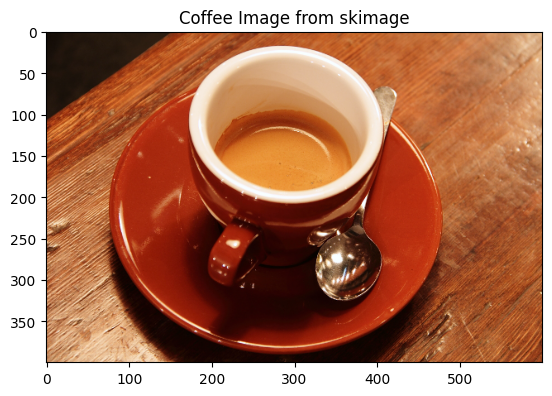

M = 400 columns, N = 600 rows, NC = 3 color channels


In [10]:
import matplotlib.pyplot as plt
import skimage as sk # load skimage libraries
from skimage.data import coffee

image = coffee() # shape: (400, 600, 3), dtype: uint8

# Display the image
plt.imshow(image)
plt.title('Coffee Image from skimage')
plt.show()

print('M = {} columns, N = {} rows, NC = {} color channels'.format(*image.shape)) # Print out image size

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise


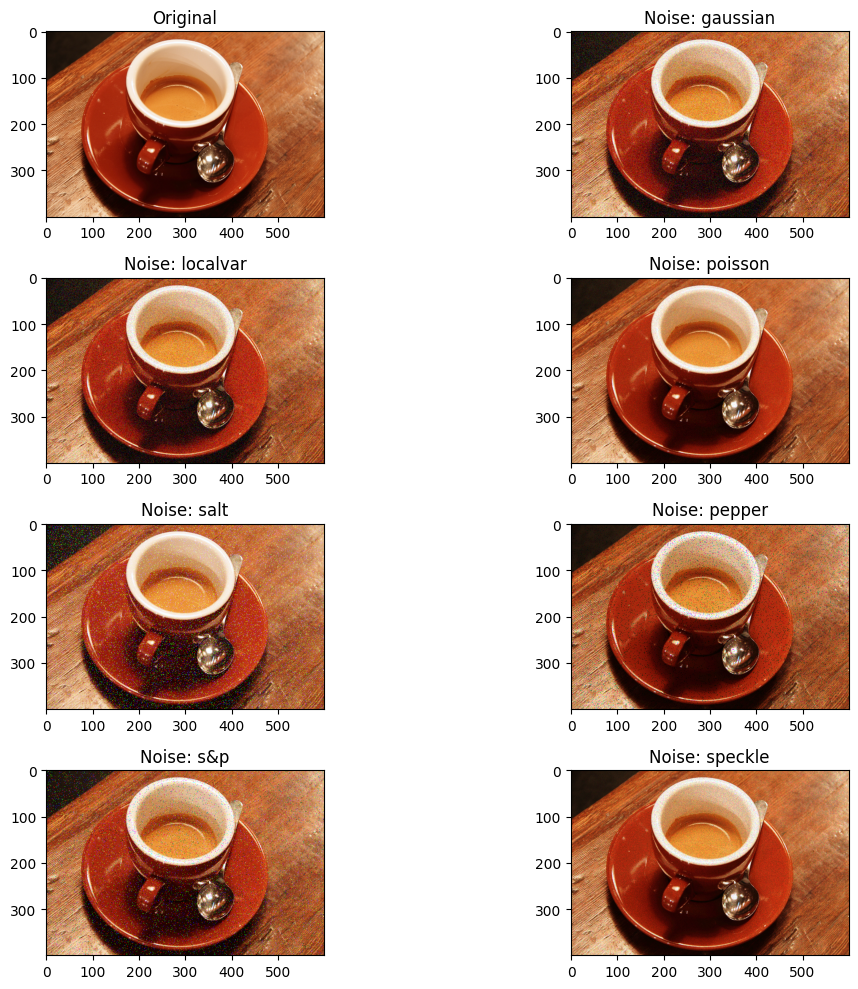

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float, random_noise

image = img_as_float(image)  # Convert to float in [0, 1] as required by random_noise

# Define noise types
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']

# Create a list of noisy images
noisy_images = [random_noise(image, mode=noise) for noise in noise_types]

# Plot original + 7 noisy versions in a 4x2 grid
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.ravel()

# Show original
axes[0].imshow(image)
axes[0].set_title("Original")

# Show noisy versions
for i, noisy_img in enumerate(noisy_images):
    axes[i+1].imshow(noisy_img)
    axes[i+1].set_title(f"Noise: {noise_types[i]}")

plt.tight_layout()
plt.show()

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

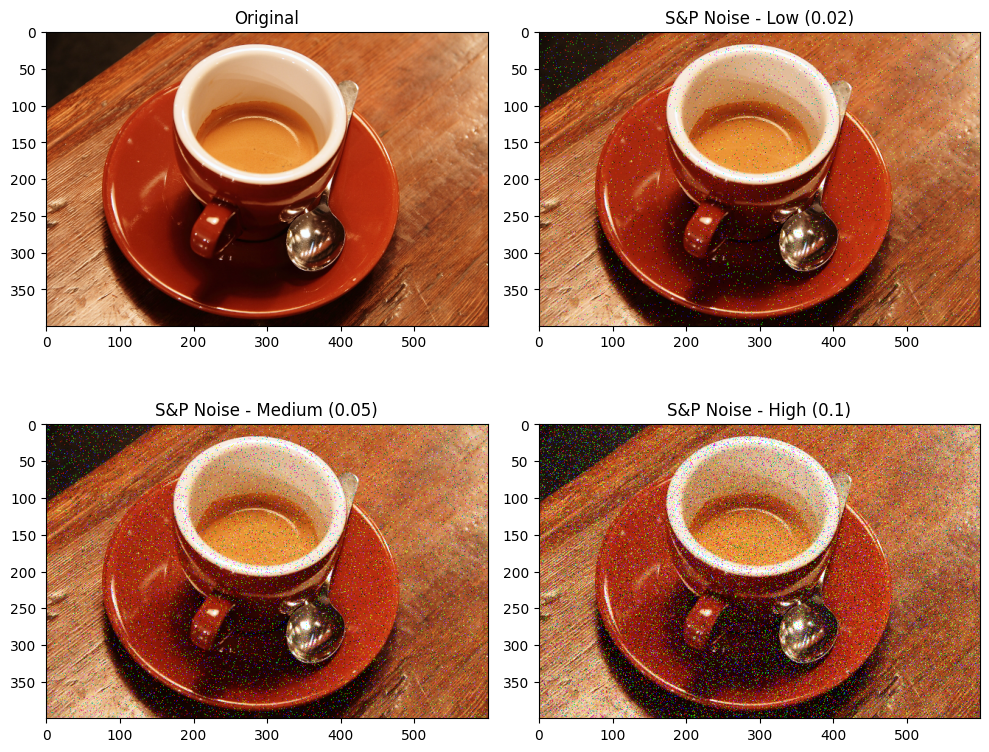

In [14]:
# Generate images with salt and pepper noise with increasing noise intensity
noisy_low = random_noise(image, mode='s&p', amount=0.02)   # Low noise
noisy_medium = random_noise(image, mode='s&p', amount=0.05)  # Medium noise
noisy_high = random_noise(image, mode='s&p', amount=0.1)   # High noise

# Plot original + 3 noise levels in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

axes[0].imshow(image)
axes[0].set_title("Original")

axes[1].imshow(noisy_low)
axes[1].set_title("S&P Noise - Low (0.02)")

axes[2].imshow(noisy_medium)
axes[2].set_title("S&P Noise - Medium (0.05)")

axes[3].imshow(noisy_high)
axes[3].set_title("S&P Noise - High (0.1)")

plt.tight_layout()
plt.show()

**- Task 4:** The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

<ipython-input-18-0ba005da26cb>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(brick) # visualize image using imshow function
<ipython-input-18-0ba005da26cb>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


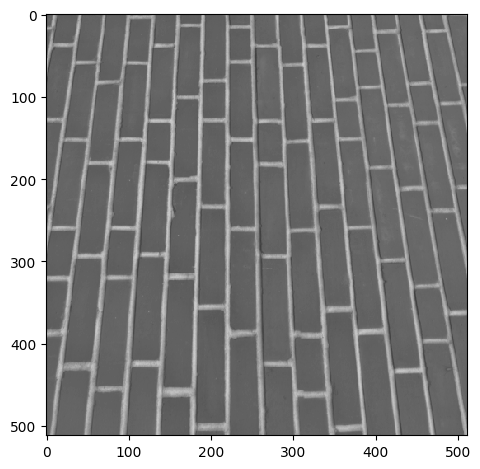

In [ ]:
import skimage as sk # load skimage libraries
brick = sk.data.brick() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(brick) # visualize image using imshow function
sk.io.show()
#print('M = {} columns, N = {} rows, NC = {} color channels'.format(*brick.shape))


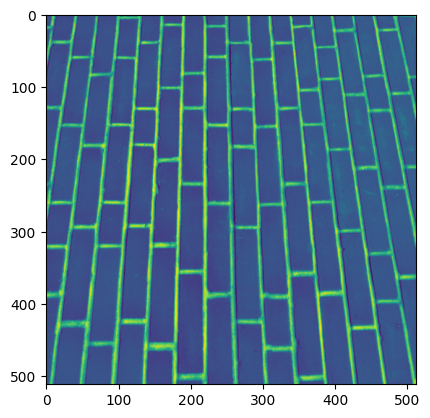

In [ ]:

plt.imshow(brick)







**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk


